### Práctica: Respuestas de un circuito eléctrico de segundo orden.

**Objetivo:** Modelar un circuito eléctrico de segundo orden mediante el análisis de mallas para obtener su función de transferencia. Simular la respuesta del sistema ante una entrada escalón, analizando y comparando los casos de respuesta subamortiguada, críticamente amortiguada y sobreamortiguada a través de la modificación de los parámetros del circuito y la ubicación de los polos del sistema.

#### Paso 1: Planteamiento del sistema.

Para nuestro análisis, utilizaremos un circuito RLC de dos mallas. La entrada será el voltaje de la fuente, $V_{in}(t)$, y la salida será el voltaje en la resistencia $R_2$, que denotaremos como $V_{out}(t)$.

![Diagrama del circuito eléctrico](Practicas/assets/images/P_2_02_Diagrama.png)

*Figura 1. Diagrama eléctrico del circuito.*

#### Paso 2: Obtención de la Función de Transferencia.

Realizaremos el análisis de mallas directamente en el dominio de Laplace, asumiendo condiciones iniciales iguales a cero. Las impedancias de los componentes son $R_1$, $R_2$, $sL$ y $\frac{1}{sC}$.

Aplicamos la Ley de Voltajes de Kirchhoff (LVK) a cada malla:

**Ecuación de la Malla 1:**
$$ V_{in}(s) = (R_1 + \frac{1}{sC})I_1(s) - \frac{1}{sC}I_2(s) \quad \dots (1) $$

**Ecuación de la Malla 2:**
$$ 0 = -\frac{1}{sC}I_1(s) + (R_2 + sL + \frac{1}{sC})I_2(s) \quad \dots (2) $$

La salida del sistema es $V_{out}(s) = R_2 I_2(s)$. Nuestro objetivo es encontrar la función de transferencia $G(s) = \frac{V_{out}(s)}{V_{in}(s)}$. 

Para ello, necesitamos resolver el sistema de ecuaciones para $I_2(s)$. Utilizando la regla de Cramer, obtenemos:
$$ I_2(s) = \frac{\begin{vmatrix} R_1 + \frac{1}{sC} & V_{in}(s) \\ -\frac{1}{sC} & 0 \end{vmatrix}}{\begin{vmatrix} R_1 + \frac{1}{sC} & -\frac{1}{sC} \\ -\frac{1}{sC} & R_2 + sL + \frac{1}{sC} \end{vmatrix}} = \frac{\frac{1}{sC}V_{in}(s)}{(R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2} $$

Desarrollando el denominador:
$$ (R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2$$
$$ = R_1R_2 + sL R_1 + \frac{R_1}{sC} + \frac{R_2}{sC} + \frac{L}{C} + \frac{1}{s^2 C^2} - \frac{1}{s^2 C^2}$$
$$ = sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC} $$

Sustituyendo el denominador en la expresión de $I_2(s)$:
$$ I_2(s) = \frac{\frac{1}{sC}V_{in}(s)}{sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC}} $$
$$ I_2(s) = \frac{V_{in}(s)}{sC (sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC})} $$
$$ I_2(s) = \frac{V_{in}(s)}{s^2LCR_1 + s(R_1R_2C+L) + (R_1+R_2)} $$

Como $V_{out}(s) = R_2 I_2(s)$, la función de transferencia final es:
$$ G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{R_2}{s^2(LCR_1) + s(L+R_1R_2C) + (R_1+R_2)} $$

El **polinomio característico** del sistema (el denominador) es:
$$ \Delta = s^2 (LCR_1) + s(L+R_1R_2C) + (R_1 + R_2) = 0 $$

Las raíces de este polinomio, que son los polos del sistema, determinan la naturaleza de la respuesta transitoria.

#### Paso 3: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{subamortiguada} = 4 \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta submortiguada**. Un sistema subamortiguado tiene un par de números complejos conjugados con partes reales negativas.


##### *Análisis de las raíces para el caso subamortiguado:*

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(4 \cdot 1 \cdot 2) + s(4 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 8 s^2 + 8s + 4 = 0 $$
$$ s^2 + s + \frac{1}{2} = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-1 \pm \sqrt{1^2 - 4 \cdot 1 \cdot \frac{1}{2}}}{2 \cdot 1} $$
$$ s = - \frac{1}{2} \pm \frac{\sqrt{-1}}{2} $$

Por lo que se obtiene:
$$ s = - \frac{1}{2} \pm \frac{1}{2}j $$

Como las raíces son complejos conjugados con parte real negativa, la respuesta es **subamortiguada**.

#### Paso 3.a) Crear la Función de Transferencia.

In [8]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_subamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_subamortiguado)


La Función de Transferencia es:
<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  8 s^2 + 8 s + 4


#### Paso 3.b) Visualizar el mapa de polos y ceros.

Las raíces de s (polos) son:
[-0.5+0.5j -0.5-0.5j]


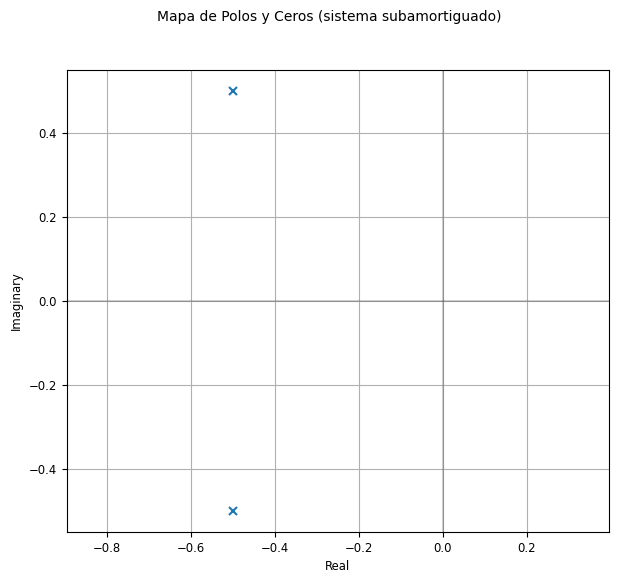

In [9]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_subamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_subamortiguado, title='Mapa de Polos y Ceros (sistema subamortiguado)')
plt.grid(True)
plt.show()


#### Paso 3.c) Graficar la respuesta del sistema.

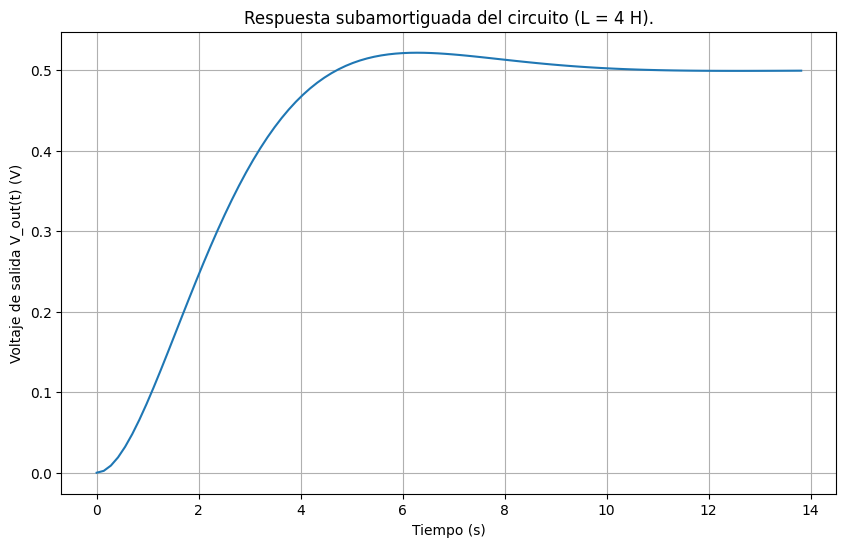

In [10]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_subamortiguado = ct.step_response(sistema_subamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_subamortiguado)
plt.title('Respuesta subamortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()


#### Ejercicio propuesto. Análisis de las respuestas críticamente amortiguada y sobreamortiguada.

Ahora que hemos analizado y simulado el caso subamortiguado, tu tarea es encontrar los valores de $L$ que producen las respuestas críticamente amortiguada y sobreamortiguada.

**Instrucciones:**

1.  **Respuesta Críticamente Amortiguada:**
    Recuerde que la ecuación característica del sistema es:
    $$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
    
    Manteniendo $R_1 = 2 \, \Omega$, $R_2 = 2 \, \Omega$ y $C = 1 \, F$, determina analíticamente 
    el valor de $L$ que hace que el discriminante del polinomio característico ($b^2-4ac$) sea igual a cero. 
    $$ \implies (L + R_1 R_2 C)^2 - 4 \cdot (LCR_1) \cdot (R_1 + R_2) = 0 $$

    Esto resultará en dos polos negativos, reales e iguales.
    * Muestra tu cálculo en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.
    
2.  **Respuesta Sobreamortiguada:**
    * Elige un valor de $L$ adecuado (valor propuesto con base en el análisis del valor para el caso críticamente amortiguado y el que se propuso al inicio para el caso subamortiguado).
    * Demuestra analíticamente que, con este nuevo valor de $L$, las raíces son dos números reales, distintos y negativos. Incluye este análisis en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.

3.  **Gráfica comparativa:**
    * En una celda final, crea un único script que grafique las tres respuestas (subamortiguada, críticamente amortiguada y sobreamortiguada) en la misma figura.
    * Usa `plt.legend()` para identificar claramente cada curva. Esto te permitirá visualizar directamente cómo el cambio en un solo elemento afecta la dinámica del sistema.

2. Respuesta Criticamente Amortiguada.

Para obtener una respuesta criticamente amortiguada $b^2 - 4ac = 0$.

La ecuación característica es: $s^2(LC_R) + s(L + R_1R_2C) + (R_1 + R_2) = 0$.
Identificamos los coeficientes:
- $a = LCR_1$
- $b = L + R_1R_2C$
- $c = R_1 + R_2$

Sustituyendo $R_1 = 2 \Omega$, $R_2 = 2 \Omega$ y $C = 1 F$:
- $a = L(1)(2) = 2L$
- $b = L + (2)(2)(1) = L + 4$
- $c = 2 + 2 = 4$

Establecemos la condición del discriminante igual a cero:
$$(L + 4)^2 - 4(2L)(4) = 0$$
$$
L^2 + 8L + 16 - 32L = 0$$
$$L^2 - 24L + 16 = 0$$
Resolvemos la ecuación cuadrática 
$$
L = \frac{24 \pm \sqrt{(-24)^2 - 4(1)(16)}}{2(1)}$$
$$L = \frac{24 \pm \sqrt{576 - 64}}{2} = \frac{24 \pm \sqrt{512}}{2}$$
$$
L = \frac{24 \pm 16\sqrt{2}}{2} = 12 \pm 8\sqrt{2}$$
Los valores posibles para $L$ son:
- $L_1 = 12 + 8\sqrt{2} = 23.31 H$
- $L_2 = 12 - 8\sqrt{2} = 0.686 H$

Tomando  el valor más pequeño, $L = 0.686 H$, realizamos la simulación. 

Función de Transferencia Críticamente Amortiguada:
<TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             2
  -----------------------
  1.373 s^2 + 4.686 s + 4

Los polos son:
[-1.70710683+0.j -1.70710673+0.j]


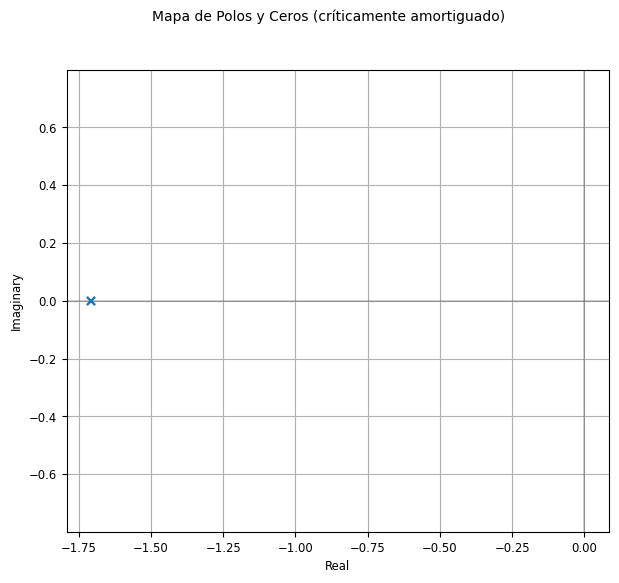

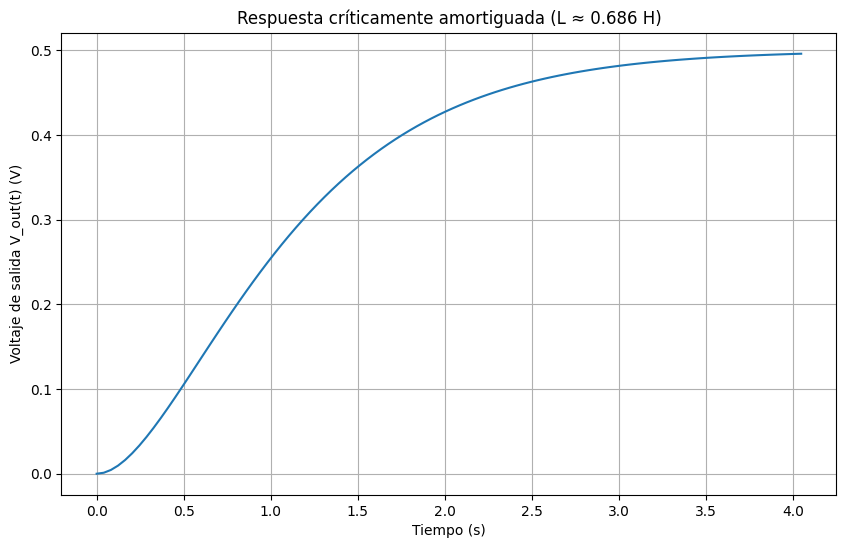

In [14]:
R1 = 2
R2 = 2
C = 1
L_crit = 12 - 8 * np.sqrt(2)

num = [R2]
den_crit = [L_crit*C*R1, (L_crit + R1*R2*C), (R1 + R2)]

sistema_critico = ct.tf(num, den_crit)

print("Función de Transferencia Críticamente Amortiguada:")
print(sistema_critico)

polos_criticos = ct.poles(sistema_critico)
print("\nLos polos son:")
print(polos_criticos)

plt.figure(figsize=(7, 6))
ct.pzmap(sistema_critico, title='Mapa de Polos y Ceros (críticamente amortiguado)')
plt.grid(True)
plt.show()

t_crit, vout_critico = ct.step_response(sistema_critico)

plt.figure(figsize=(10, 6))
plt.plot(t_crit, vout_critico)
plt.title(f'Respuesta críticamente amortiguada (L ≈ {L_crit:.3f} H)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

3. Respuesta Sobreamortiguada.

Para obtener una respuesta sobreamortiguada b² - 4ac > 0, eso es dos polos reales, distintos y negativos.


Para este ejercicio, se propone un valor de L = 0.5 H.

Análisis de las raíces para L = 0.5 H:

$s^2(LCR_1) + s(L + R_1R_2C) + (R_1 + R_2) = 0$

$s^2(0.5 \cdot 1 \cdot 2) + s(0.5 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0$

$s^2 + 4.5s + 4 = 0$

Calculamos las raíces:

$s = \frac{-4.5 \pm \sqrt{4.5^2 - 4(1)(4)}}{2(1)}$

$s = \frac{-4.5 \pm \sqrt{20.25 - 16}}{2}$

$s = \frac{-4.5 \pm \sqrt{4.25}}{2}$

Las raíces son:

$s_1 = \frac{-4.5 + \sqrt{4.25}}{2} \approx -1.219$

$s_2 = \frac{-4.5 - \sqrt{4.25}}{2} \approx -3.281$

Como las raíces son dos números reales, distintos y negativos, la respuesta será sobreamortiguada.

Función de Transferencia Sobreamortiguada:
<TransferFunction>: sys[12]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  s^2 + 4.5 s + 4

Los polos son:
[-3.28077641+0.j -1.21922359+0.j]


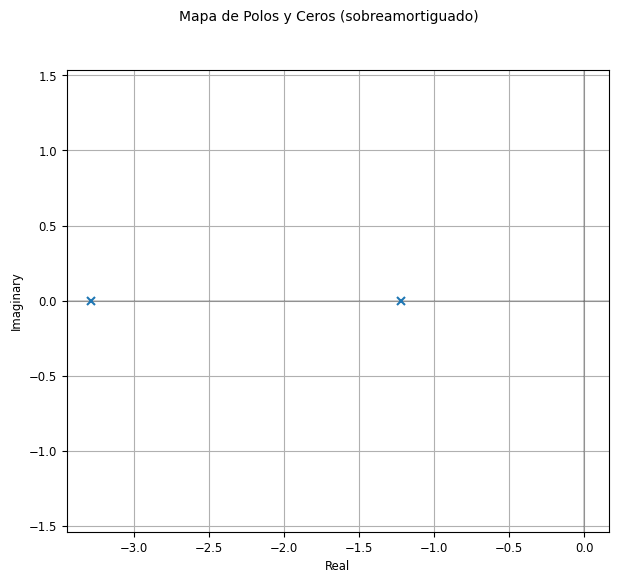

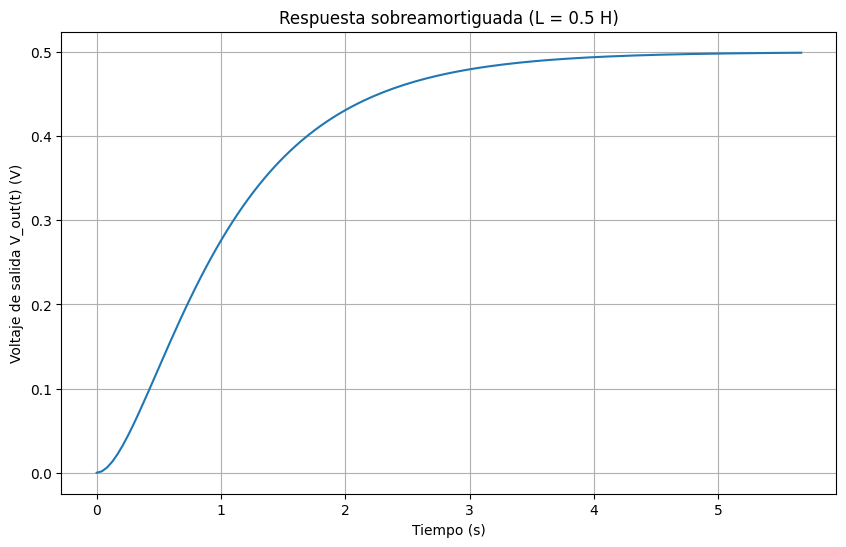

In [15]:
R1 = 2
R2 = 2
C = 1
L_sobre = 0.5

num = [R2]
den_sobre = [L_sobre*C*R1, (L_sobre + R1*R2*C), (R1 + R2)]

sistema_sobreamortiguado = ct.tf(num, den_sobre)

print("Función de Transferencia Sobreamortiguada:")
print(sistema_sobreamortiguado)

polos_sobre = ct.poles(sistema_sobreamortiguado)
print("\nLos polos son:")
print(polos_sobre)

plt.figure(figsize=(7, 6))
ct.pzmap(sistema_sobreamortiguado, title='Mapa de Polos y Ceros (sobreamortiguado)')
plt.grid(True)
plt.show()

t_sobre, vout_sobre = ct.step_response(sistema_sobreamortiguado)

plt.figure(figsize=(10, 6))
plt.plot(t_sobre, vout_sobre)
plt.title(f'Respuesta sobreamortiguada (L = {L_sobre} H)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

3. Gráfica Comparativa.
Para visualizar el efecto del parámetro $L$ en la dinámica de la respuesta transitoria, graficaremos las tres respuestas en un mismo plano.

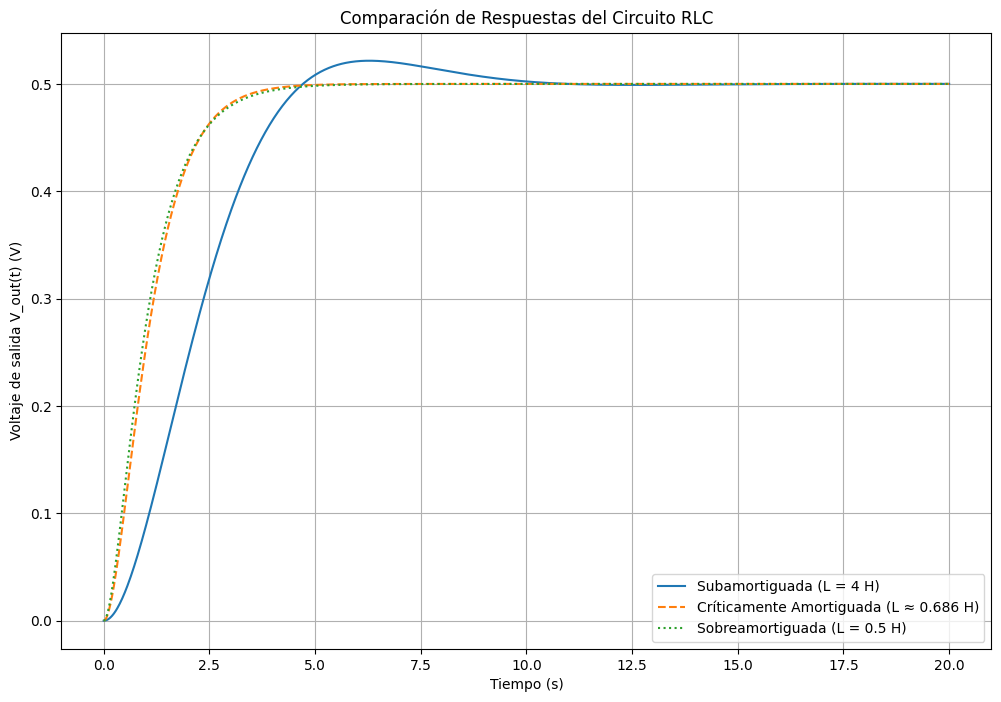

In [16]:
T = np.linspace(0, 20, 1000)

_, vout_sub_comp = ct.step_response(sistema_subamortiguado, T=T)
_, vout_crit_comp = ct.step_response(sistema_critico, T=T)
_, vout_sobre_comp = ct.step_response(sistema_sobreamortiguado, T=T)

plt.figure(figsize=(12, 8))

plt.plot(T, vout_sub_comp, label=f'Subamortiguada (L = {L} H)')
plt.plot(T, vout_crit_comp, label=f'Críticamente Amortiguada (L ≈ {L_crit:.3f} H)', linestyle='--')
plt.plot(T, vout_sobre_comp, label=f'Sobreamortiguada (L = {L_sobre} H)', linestyle=':')

plt.title('Comparación de Respuestas del Circuito RLC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.legend()
plt.grid(True)
plt.show()